In [2]:

def naive_bayes_model() -> None:
    from sklearn.datasets import make_blobs
    X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
    
    fig, ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model', size=14)
    
    xlim = (-8, 8)
    ylim = (-15, 5)
    
    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
    
    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mu, std = X[mask].mean(0), X[mask].std(0)
        P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
        Pm = np.ma.masked_array(P, P < 0.03)
        ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                      cmap=color.title() + 's')
        ax.contour(xx, yy, P.reshape(xx.shape),
                   levels=[0.01, 0.1, 0.5, 0.9],
                   colors=color, alpha=0.2)
        
    ax.set(xlim=xlim, ylim=ylim)
    
    fig.savefig('images/05.05-gaussian-NB.png')
    return

In [3]:
# NAIVE BAYES CLASSIFICATION
# Naive Bayes classifiers are built of Bayesian classification methods. These
# rely on Bayes's theorem. In Bayesian classification, we're interested in
# finding the probability of a label given some observed features, which we 
# can write as P(L | features). All we need is some model by which we can
# compute P(features | L_i) for each label. Such a model is a generative model
# because it specifies the hypothetical random process that generates the data. 
# Specifying this generative model for each label is the main piece of the
# training of such a Bayesian classifier. The general version of such a
# training step is a very difficult task, but we can make it simpler through
# the use of some simplifying assumptions about the form of this model. This
# is where the "naive" in "naive Bayes" comes in: If we make very naive
# assumptions about the generative model for each label, we can find a rough
# approximation of the generative model for each class, and then proceeed with
# the Bayesian classification.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('dark_background')

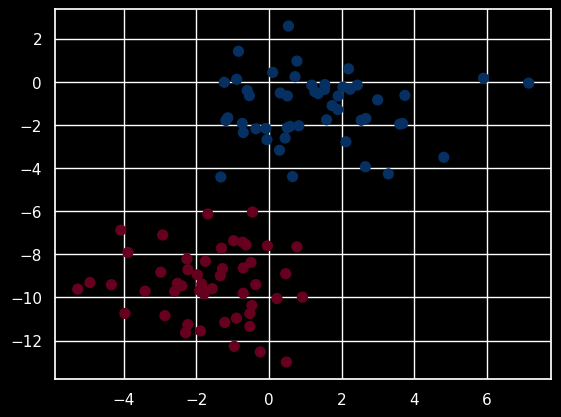

In [5]:
# GAUSSIAN NAIVE BAYES
# Perhaps the easiest naive Bayes classifier to understand is Gaussian naive
# Bayes. In this classifier, the assumption is that the data from each label
# is drawn from a simple Gaussian distribution.
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu');

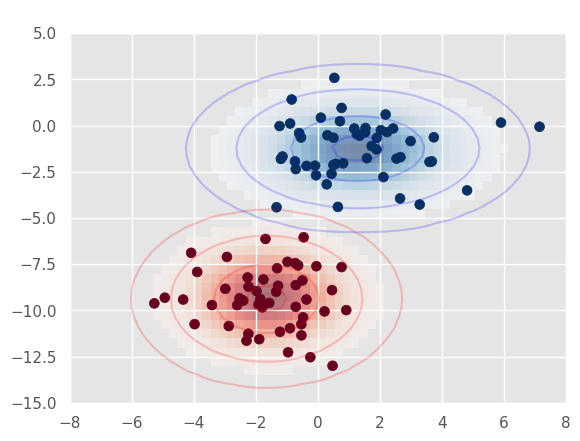

In [24]:
# One extremely fast way to create a simple model is to assume that the data
# is described by a Gaussian distribution with no covariance between 
# dimmensions. We can fit this model by simply finding the mean and standard
# deviation of the points within each label. The result of this naive
# Gaussian assumption is shown here.
plt.style.use('ggplot')
naive_bayes_model()
plt.style.use('dark_background')

In [7]:
# The ellipses represent the Gaussian generative model for each label, with 
# larger probability toward the center of the ellipses. With this model in
# place for each class, we have a simple recipe to compute the likelihood 
# P(features | L_i) for any data point, and thus we can quickly compute the
# posterior ratio and determine which label is the most probable for a given 
# point. This procedure is implemented in scikit-learn's GaussianNB estimator.
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [8]:
# Now, let's generate some new data and predict the label.
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

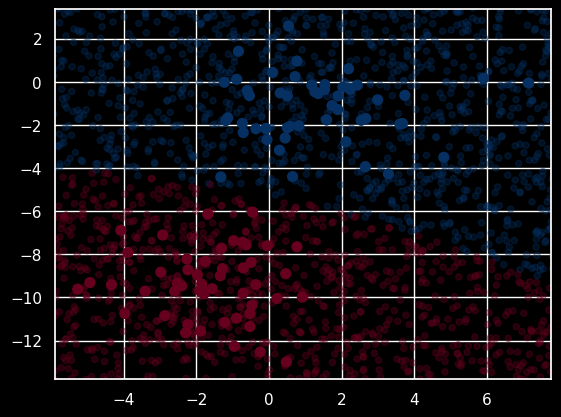

In [9]:
# Now we can plot this new data to get an idea of where the decition boundary
# is.
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20,
            cmap = 'RdBu', alpha = .35)
plt.axis(lim);
# We see a slightly curved boundary in the classifications. In general,
# the boundary in Gaussian naive Bayes is quadratic.

In [10]:
# A nice piece of this Bayesian formalism is that is naturally allows for 
# probabilistic classification, wich we can compute using the predict_proba 
# method.
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
# The columns give the posterior probabilities of the first and second label,
# respectively. If you are looking for estimates of uncertainty in your 
# classification, Bayesian approaces like this can be a useful approach. Of
# course, the finnal classification will only be as good as the model
# assumptions that lead to it, which is why Gaussian naive Bayes often does 
# not produce very good results. Still, in many cases (especially as the
# number of features becomes large) this assumption is not detrimental enough 
# to prevent Gaussian naive Bayes from being a useful method.

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [11]:
# MULTINOMIAL NAIVE BAYES
# Another useful example is the multinomial naive Bayes, where the features
# are assumed to be generated from a simple multinomial distribution. The 
# multinomial distribution describes the probability of observing counts 
# among a number of categories, and thus multinomial naive Bayes is most
# appropriate for features that represent counts or count rates.

In [12]:
# EXAMPLE: CLASSIFYING TEXT
# One place where multinomial naive Bayes is often used is in text
# classification, where the features are related to word counts or frequencies
# within the documents to be classified. Here we will use the sparse word
# count features from the 20 Newsgroups corpus to show how we might classify
# these short documents into categories. Let's download the data and take a
# look at the target names:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names
# Let's select a few of these categories and download the training and testing
# set

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
categories = ['talk.religion.misc', 
              'soc.religion.christian',
              'sci.space',
              'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [14]:
# Here is a representative entry from the data
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [15]:
# In order to use this data for machine learning, we need to be able to
# convert the content of each string into a vector of numbers. For this we
# will use the TF-IDF (term frequency-inverse document frequency) vectorizer, 
# and create a pipeline that attaches it to a multinomial naive Bayes 
# classifier.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
# With this pipeline, we can apply the model to the training data, and predict
# labels for the test data.
model.fit(train.data, train.target)
labels = model.predict(test.data)

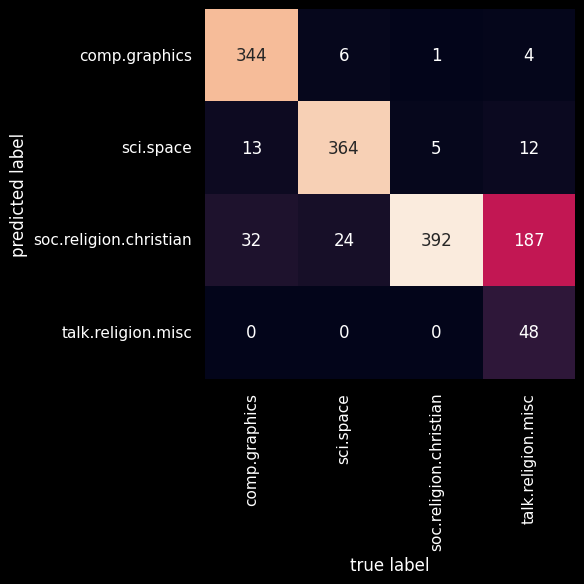

In [17]:
# Now that we have predicted the labels for the test data, we can evaluate
# them to learn about the performance of the estimator. For example, here is
# the confusion matrix between the true and predicted labels for the test data.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [18]:
# Evidently, even this very simple classifier can successfully separate space 
# talk from computer talk, but it gets confused between talk about religion
# and talk about Christianity.

In [19]:
# The very cool thing here is t hat we now have the tools to determine the
# category for ANY string, using the predict() method of this pipeline. 
# Here's a quick utility function that will return the prediction for a 
# single string.
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [20]:
predict_category("sending a payload to the ISS")

'sci.space'

In [21]:
predict_category("discussing islam vs atheism")

'soc.religion.christian'

In [22]:
predict_category("determining the screen resolution")

'comp.graphics'

In [23]:
# Remember that this is nothing more sophisticated than a simple probability 
# model for the (weighted) frequency of each word in the string.